In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd 
import pydotplus

In [2]:
# Read the csv and perform basic data cleaning
bean_df = pd.read_csv("Resources/Dry_Bean_Dataset.csv")
# Drop the null columns where all values are null
bean_df = bean_df.dropna(axis='columns', how='all')
# Drop the null rows
bean_df = bean_df.dropna()
bean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [23]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
# Identify labels (y-value)
y = bean_df["Class"]
# y
# Drop the y-label to use for the test
X = bean_df.drop("Class", axis=1)
feature_names = X.columns
# X.head()
print(X.shape, y.shape)

(13611, 16) (13611,)


In [4]:
# Create a train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create a Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
model = clf.fit(X_train, y_train)
print(f"Decision Tree Training Data Score: {clf.score(X_train, y_train)}")
print(f"Decision Tree Testing Data Score: {clf.score(X_test, y_test)}")

Decision Tree Training Data Score: 1.0
Decision Tree Testing Data Score: 0.8956802821040258


In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz

# # Create DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=feature_names,  
#                                 class_names=y)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# # Write graph to a png file
# from IPython.display import Image
# Image(graph.create_png())

In [ ]:
# Create PNG 
# graph.write_png("tree_df.png")

In [10]:
# Calculate feature importances for Decision Tree
importances_dt = list(clf.feature_importances_)
# importances_dt
# List of tuples with variable and importance
feature_importances_dt = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances_dt)]
# Sort the feature importances by most important first
feature_importances_dt = sorted(feature_importances_dt, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_dt];

Variable: MajorAxisLength      Importance: 0.18
Variable: ShapeFactor1         Importance: 0.18
Variable: Perimeter            Importance: 0.16
Variable: ShapeFactor3         Importance: 0.14
Variable: Compactness          Importance: 0.09
Variable: MinorAxisLength      Importance: 0.08
Variable: roundness            Importance: 0.06
Variable: ShapeFactor4         Importance: 0.03
Variable: Extent               Importance: 0.02
Variable: Solidity             Importance: 0.02
Variable: Area                 Importance: 0.01
Variable: ConvexArea           Importance: 0.01
Variable: EquivDiameter        Importance: 0.01
Variable: ShapeFactor2         Importance: 0.01
Variable: AspectRation         Importance: 0.0
Variable: Eccentricity         Importance: 0.0


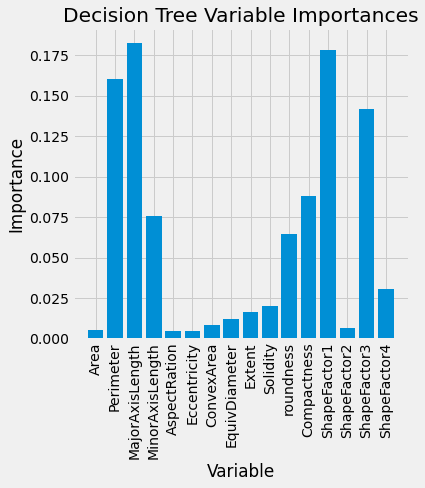

In [11]:
# list of x locations for plotting
plt.figure(1, figsize=(6,7))
x_values = list(range(len(importances_dt)))
# Make a bar chart
plt.bar(x_values, importances_dt, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Decision Tree Variable Importances')
plt.tight_layout()
# plt.savefig("Decision_Tree_Importances")

In [16]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9224213928886277


In [25]:
# Make predictions with Random Forest Classifier
predictions = rf.predict(X_test)

print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: ['SEKER' 'BARBUNYA' 'SEKER' 'SEKER' 'DERMASON' 'SEKER' 'CALI' 'SEKER'
 'BOMBAY' 'DERMASON']
First 10 Actual labels: ['SEKER', 'BARBUNYA', 'SEKER', 'SEKER', 'DERMASON', 'SEKER', 'CALI', 'SEKER', 'BOMBAY', 'DERMASON']


In [18]:
# Show dataframe
final_bean_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
final_bean_df.head()

,Prediction,Actual
0,SEKER,SEKER
1,BARBUNYA,BARBUNYA
2,SEKER,SEKER
3,SEKER,SEKER
4,DERMASON,DERMASON


In [19]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["seker", "barbunya", "dermason", "cali", "bombay", "sira", "horoz"]))

              precision    recall  f1-score   support

       seker       0.94      0.90      0.92       344
    barbunya       1.00      1.00      1.00       142
    dermason       0.92      0.94      0.93       402
        cali       0.90      0.92      0.91       851
      bombay       0.96      0.96      0.96       486
        sira       0.94      0.94      0.94       513
       horoz       0.88      0.87      0.87       665

    accuracy                           0.92      3403
   macro avg       0.94      0.93      0.93      3403
weighted avg       0.92      0.92      0.92      3403



In [20]:
# Calculate feature importances for Random Forest
importances_rf = list(rf.feature_importances_)
# importances_rf
# List of tuples with variable and importance
feature_importances_rf = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances_rf)]
# feature_importances_rf
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_rf];

Variable: Area                 Importance: 0.07
Variable: Perimeter            Importance: 0.09
Variable: MajorAxisLength      Importance: 0.08
Variable: MinorAxisLength      Importance: 0.08
Variable: AspectRation         Importance: 0.06
Variable: Eccentricity         Importance: 0.05
Variable: ConvexArea           Importance: 0.07
Variable: EquivDiameter        Importance: 0.06
Variable: Extent               Importance: 0.01
Variable: Solidity             Importance: 0.02
Variable: roundness            Importance: 0.06
Variable: Compactness          Importance: 0.09
Variable: ShapeFactor1         Importance: 0.08
Variable: ShapeFactor2         Importance: 0.04
Variable: ShapeFactor3         Importance: 0.11
Variable: ShapeFactor4         Importance: 0.03


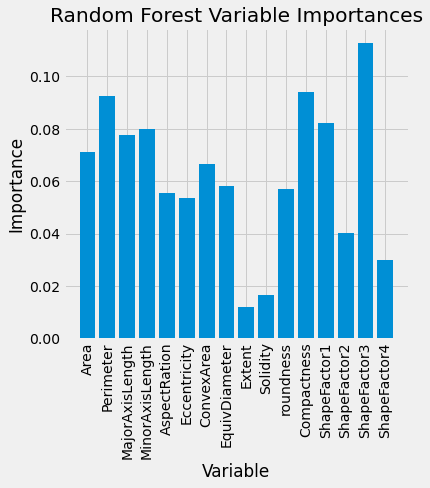

In [21]:
# list of x locations for plotting
plt.figure(1, figsize=(6,7))
x_values = list(range(len(importances_rf)))
# Make a bar chart
plt.bar(x_values, importances_rf, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Variable Importances')
plt.tight_layout()
plt.savefig("Random_Forest_Importances")

In [ ]:
# Import tools needed for visualization
# import pydotplus
# from sklearn.tree import export_graphviz

# Pull out one tree from the forest
# tree = rf.estimators_[5]

In [ ]:
# Export the image to a dot file
# dot_data = export_graphviz(tree, out_file = None, feature_names = feature_names, rounded = True, precision = 1)

In [ ]:
# Use dot file to create a graph
# graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
# Write graph to a png file
# from IPython.display import Image
# Image(graph.create_png())

In [ ]:
# Create PNG 
# graph.write_png("tree.png")

In [27]:
# Limit depth of tree to 3 levels
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

ValueError: could not convert string to float: 'BARBUNYA'